In [1]:
import pandas as pd
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
# Path
path = Path.cwd()

In [3]:
# Input file
input_file = path / "output" / "Monthly Spending FC10+2.csv"

In [4]:
df = pd.read_csv(input_file)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   version             4335 non-null   object 
 1   division_receiver   4335 non-null   object 
 2   bu_receiver         4335 non-null   object 
 3   product_line_rec    4335 non-null   int64  
 4   outlet_receiver     4335 non-null   object 
 5   location            4335 non-null   object 
 6   location_key        4335 non-null   object 
 7   master              4335 non-null   object 
 8   master_id           4335 non-null   object 
 9   program             4335 non-null   object 
 10  items               4335 non-null   object 
 11  units               4335 non-null   object 
 12  k_lc                4335 non-null   float64
 13  month               4335 non-null   object 
 14  quarter             4335 non-null   object 
 15  k_eur               4335 non-null   float64
 16  k_eur_

In [5]:
df.category.unique()

array(['Other Projects', 'Top 15 projects'], dtype=object)

In [6]:
top15 = df[(df["category"] == "Top 15 projects") & (df["version"] != "Actual")]
top15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 1 to 2772
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   version             970 non-null    object 
 1   division_receiver   970 non-null    object 
 2   bu_receiver         970 non-null    object 
 3   product_line_rec    970 non-null    int64  
 4   outlet_receiver     970 non-null    object 
 5   location            970 non-null    object 
 6   location_key        970 non-null    object 
 7   master              970 non-null    object 
 8   master_id           970 non-null    object 
 9   program             970 non-null    object 
 10  items               970 non-null    object 
 11  units               970 non-null    object 
 12  k_lc                970 non-null    float64
 13  month               970 non-null    object 
 14  quarter             970 non-null    object 
 15  k_eur               970 non-null    float64
 16  k_eur_at_bud

In [7]:
grouped = top15.groupby(["version", "master", "master_id", "quarter"]
                        ).agg(spending=("k_eur", "sum")).reset_index()
grouped.info()
grouped.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   version    60 non-null     object 
 1   master     60 non-null     object 
 2   master_id  60 non-null     object 
 3   quarter    60 non-null     object 
 4   spending   60 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


,version,master,master_id,quarter,spending
0,Budget,AutoStore with new building construction,I092734,Q3,1933.993
1,Budget,DG-201184_EMR4_HMG_additional Volume,I091755,Q1,1871.350
2,Budget,DG-201184_EMR4_HMG_additional Volume,I091755,Q2,2306.850


In [8]:
grouped = grouped.sort_values(["spending", "version", "quarter"])
grouped.head(3)

,version,master,master_id,quarter,spending
26,FC,AutoStore with new building construction,I092734,Q1,6.799
58,FC,Test Icheon - HV Axle Drive Testbench,I091819,Q3,11.084
42,FC,HVE INV HMC E-GMP 800V,I090878,Q4,23.970


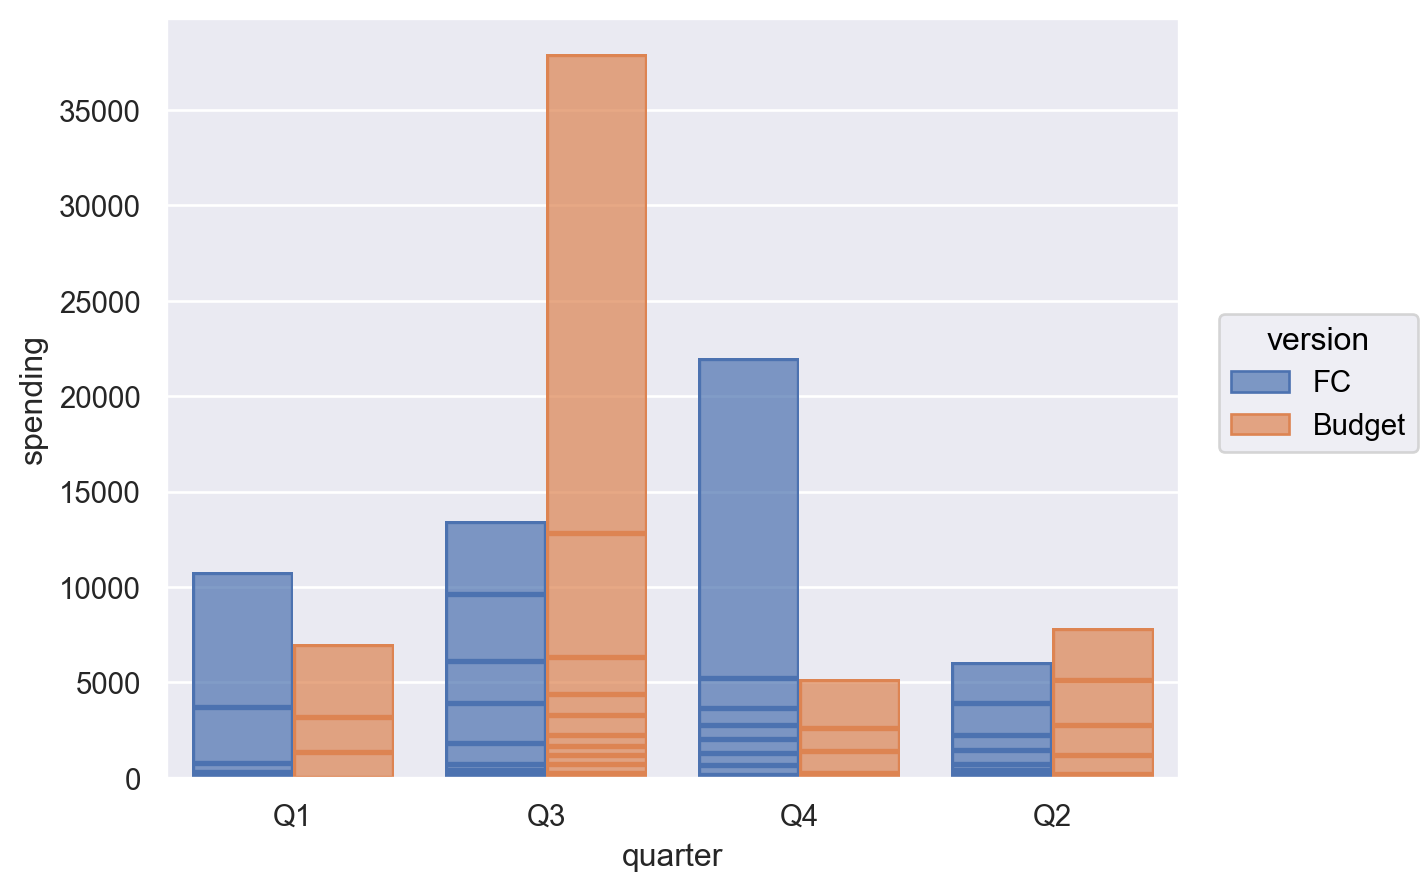

In [9]:
so.Plot(grouped, x="quarter", y="spending", color="version"
        ).add(so.Bar(), so.Dodge(), so.Stack())

In [10]:
filtered = grouped[grouped["master_id"] == "I091755"]

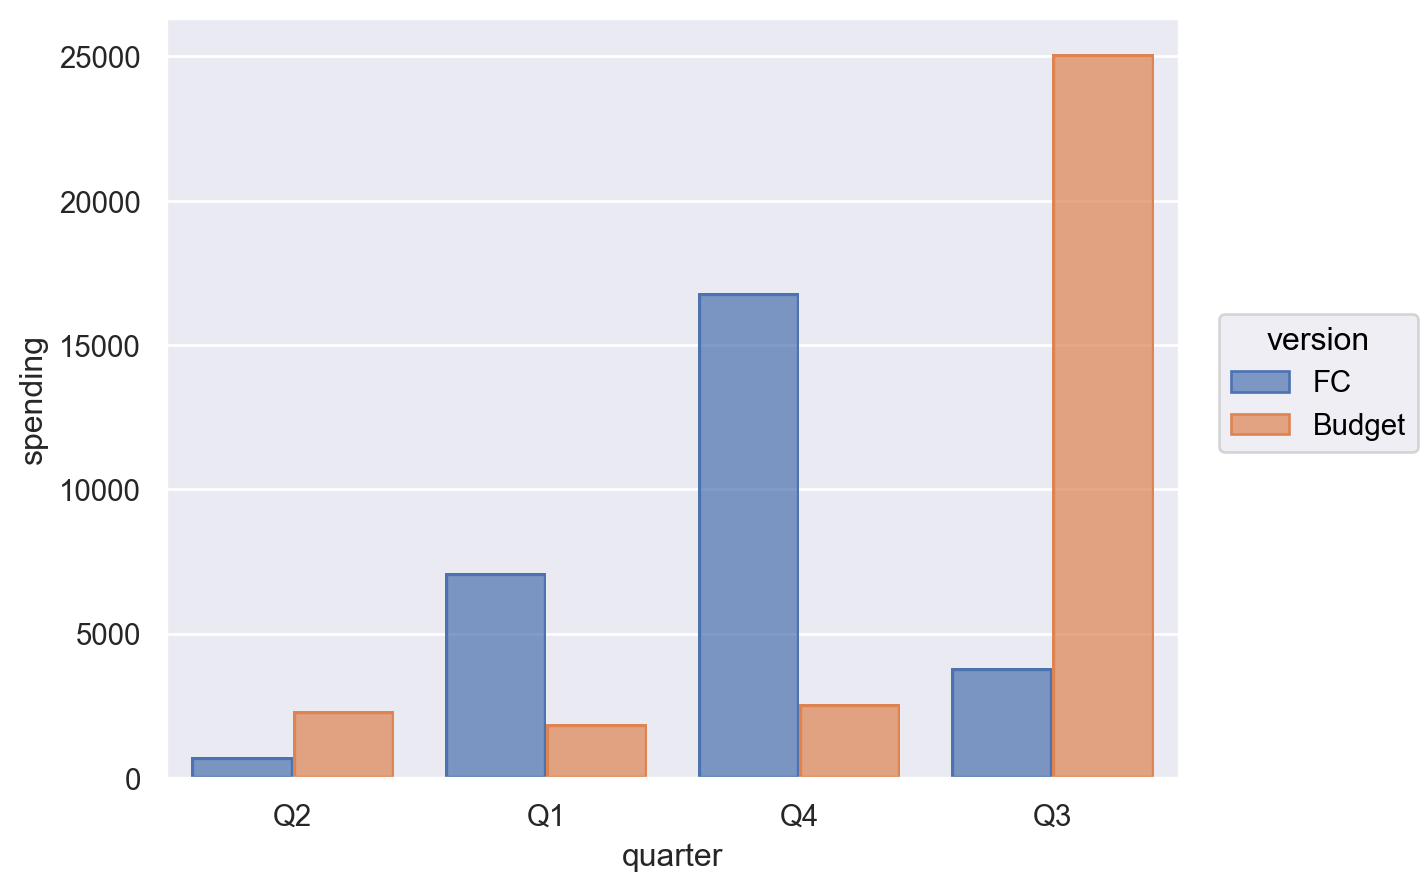

In [11]:
so.Plot(filtered, x="quarter", y="spending", color="version", 
        ).add(so.Bar(), so.Dodge(), so.Stack())

In [14]:
fig = px.bar(filtered, x="quarter", y="spending", color="version")
fig.update_layout(barmode='group', title=filtered["master"].unique()[-1])
fig.show()

In [13]:
filtered["master"].unique()[-1]

'DG-201184_EMR4_HMG_additional Volume'